In [2]:
%pip install --user responsibly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.2 MB 2.1 MB/s 
     |████████████████████████████████| 23.4 MB 1.5 MB/s 
     |████████████████████████████████| 36.7 MB 386 kB/s 
  Created wheel for gensim: filename=gensim-3.7.3-cp38-cp38-linux_x86_64.whl size=25861738 sha256=a5acbb4737780883d0f8f30e647cf4f71e7cf322b54ead06ee3b3ba0956a1993
  Stored in directory: /root/.cache/pip/wheels/dd/a5/27/d48d7feb5a01ddba1a11f9be5cc84a2853862b353e71938dae
  Created wheel for matplotlib: filename=matplotlib-2.2.5-cp38-cp38-linux_x86_64.whl size=10811610 sha256=f838bac40f1eea990b7c748ca405c3eabc8b789ce0931574bd9de6e2b6b4fa9f
  Stored in directory: /root/.cache/pip/wheels/26/dc/65/d27080ab002cb70bcc99bae054a4ad6b6ae24e8e2b1c472d34
Successfully built gensim matplotlib
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [1]:
import responsibly

# You should get '0.1.3'
responsibly.__version__


'0.1.3'

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()

In [4]:
# dataset vocabulary size

len(w2v_small.vocab)


26423

In [5]:
# get the vector of the word "love"

print('love =', w2v_small['love'])

love = [ 0.0386357  -0.0571296   0.00970471  0.0618904  -0.0618904   0.0250858
  0.109865   -0.0988782  -0.0527351   0.0754404  -0.00984205 -0.0307621
 -0.0103914  -0.0164797  -0.088258    0.0637215   0.0483405   0.0589607
  0.00283817 -0.0261844  -0.0144655   0.0298466   0.0860607  -0.0538337
  0.0629891  -0.0131838   0.0206912   0.0401006   0.0419317  -0.061158
 -0.0419317   0.0523688   0.00583656  0.0479742   0.0578621   0.028931
  0.0981458   0.0324101  -0.00943005  0.125246    0.0699472  -0.0787364
  0.0265506   0.00975049 -0.0399175  -0.0384526   0.0461432   0.0176699
  0.00828563  0.0218814  -0.0411993   0.056031   -0.0401006   0.00583656
  0.0336918   0.0421148  -0.0163881  -0.0426641  -0.00140192 -0.00682077
  0.0911877   0.0316777  -0.0265506   0.0677499   0.0131838  -0.0362553
 -0.0823985  -0.00123026 -0.0119936   0.0692148   0.106935   -0.032227
 -0.0419317   0.00801097 -0.114992   -0.0346074  -0.0710458   0.00567634
  0.069581    0.128908   -0.116457    0.0845958   0.03277

In [6]:
w2v_small['cat'] @ w2v_small['cat']

1.0000006

In [7]:
w2v_small['cat'] @ w2v_small['cats']

0.8099383

In [8]:
w2v_small['cat'] @ w2v_small['dog']

0.7609462

In [9]:
w2v_small['cat'] @ w2v_small['horse']

0.38147917

In [10]:
w2v_small['cat'] @ w2v_small['finance']

-0.037760373

In [11]:
w2v_small.most_similar('cat', topn=5)

[('cats', 0.8099379539489746),
 ('dog', 0.7609457969665527),
 ('kitten', 0.7464984655380249),
 ('feline', 0.7326232194900513),
 ('puppy', 0.707545280456543)]

In [13]:
w2v_small.doesnt_match('hairdresser nurse man woman housekeeper personal_trainer'.split())

'nurse'

In [14]:
w2v_small.doesnt_match('hairdresser nurse man woman housekeeper manager'.split())

'manager'

In [15]:
w2v_small.doesnt_match('hairdresser nurse man men housekeeper manager'.split())

'manager'

In [16]:
w2v_small.doesnt_match('hairdresser nurse woman women housekeeper manager'.split())

'manager'

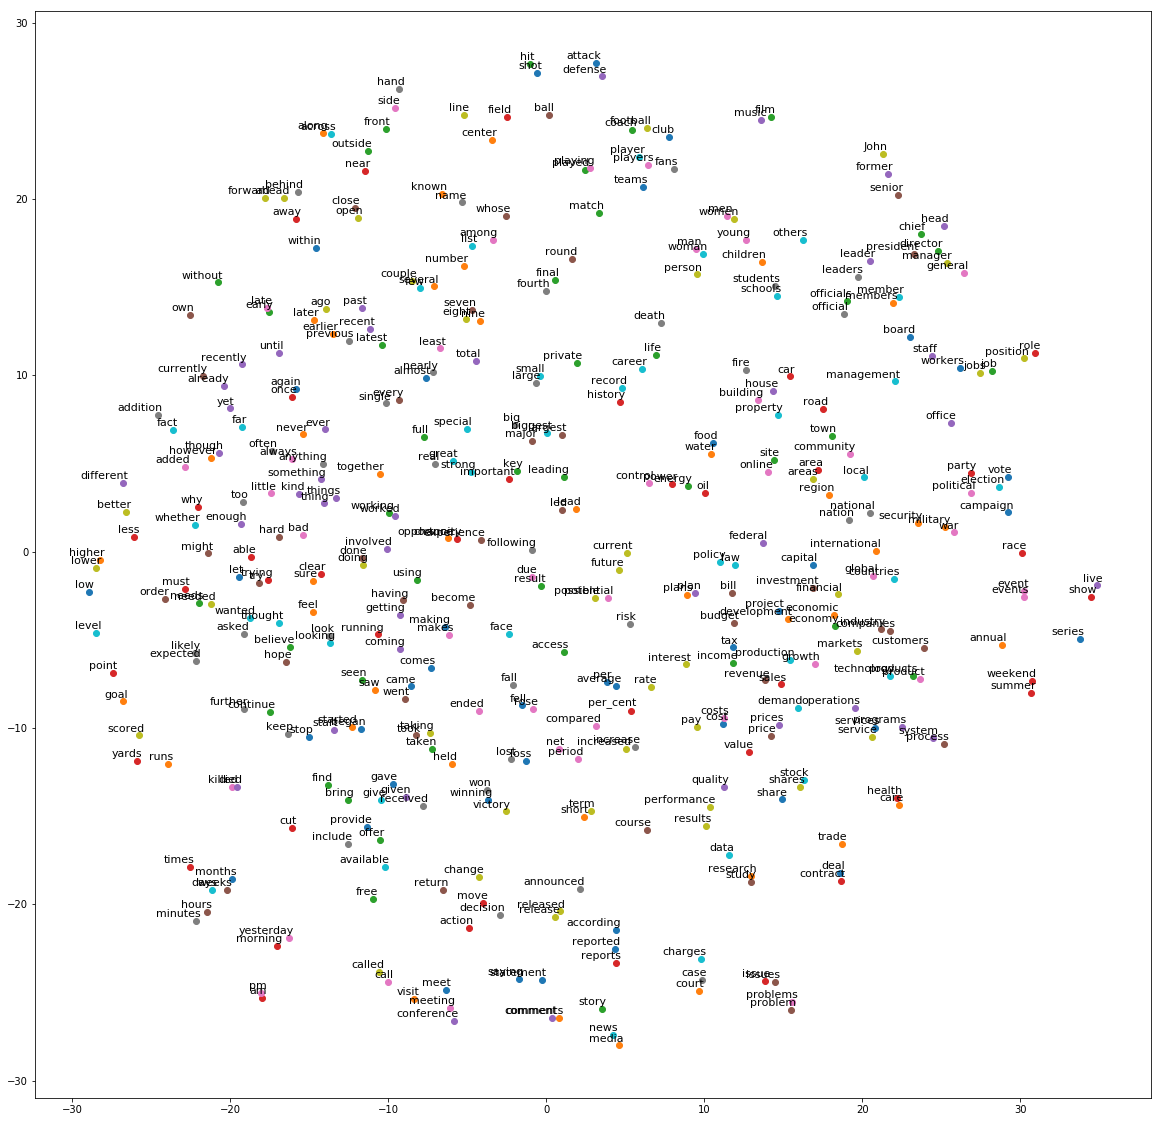

In [17]:
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in w2v_small.index2word[200:600]]

# convert the words to vectors
embeddings = [w2v_small[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()


Vector analogies

In [18]:
# small is to smaller as good is to what?
w2v_small.most_similar(positive=['good', 'smaller'], negative=['small'], topn=2)

[('better', 0.7270160913467407), ('stronger', 0.5597214102745056)]

In [19]:
# man is to carpenter as woman is to what?
w2v_small.most_similar(positive=['carpenter', 'woman'], negative=['men'], topn=2)

[('schoolteacher', 0.590914785861969), ('homemaker', 0.5572819709777832)]

In [20]:
# fish is to swim as human is to what?
w2v_small.most_similar(positive=['swim', 'human'], negative=['fish'], topn=2)

[('swimming', 0.423348605632782), ('swimmer', 0.3621695637702942)]

In [22]:
# movie is to entertain as game is to what?
w2v_small.most_similar(positive=['entertain', 'game'], negative=['movie'], topn=2)

[('games', 0.4804360866546631), ('play', 0.47248345613479614)]

In [26]:
# big is to bigger as bad is to what?
w2v_small.most_similar(positive=['bad', 'bigger'], negative=['big'], topn=2)

[('worse', 0.7033030986785889), ('better', 0.6079963445663452)]

Diagnosing Gender Bias

In [27]:
# She is to sister as he is to what?
# sister - she + he = ?

w2v_small.most_similar(positive=['sister', 'he'], negative=['she'], topn=5)

[('brother', 0.7627110481262207),
 ('younger_brother', 0.6856132745742798),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580697894096375),
 ('nephew', 0.65260249376297)]

In [28]:
#She is to interior designer as he is to what?
w2v_small.most_similar(positive=['interior_designer', 'he'], negative=['she'], topn=4)

[('architect', 0.623257040977478),
 ('carpenter', 0.46738606691360474),
 ('painter', 0.4598923623561859),
 ('restaurateur', 0.4586508572101593)]

In [29]:
#She is to interior designer as he is to what?
w2v_small.most_similar(positive=['interior_designer', 'he'], negative=['she'], topn=4)


[('architect', 0.623257040977478),
 ('carpenter', 0.46738606691360474),
 ('painter', 0.4598923623561859),
 ('restaurateur', 0.4586508572101593)]

In [30]:
from numpy.linalg import norm

gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)


In [31]:
# the @ operator returns the cosine similarity of 2 normalized vectors
gender_direction @ w2v_small['architect']


-0.16785555

In [32]:
gender_direction @ w2v_small['interior_designer']

0.19714224

In [33]:

gender_direction @ w2v_small['house']


0.07210897

In [34]:
gender_direction @ w2v_small['home']

-0.016742865

In [35]:
from responsibly.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)



In [36]:
w2v_small_gender_bias.positive_end, w2v_small_gender_bias.negative_end


('she', 'he')

In [37]:
# gender direction
w2v_small_gender_bias.direction[:10]


array([-0.10056252, -0.09987912, -0.05384335,  0.00480521,  0.01521063,
       -0.01666582,  0.00932552, -0.00625998, -0.11320096,  0.03992424])

In [38]:
# list of gender neutral professions
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']


In [39]:
neutral_profession_names[:8]

['accountant',
 'acquaintance',
 'actor',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide']

In [40]:
len(neutral_profession_names)

303

In [41]:
# the same of using the @ operator on the bias direction

w2v_small_gender_bias.project_on_direction(neutral_profession_names[0])

0.008421647916552755

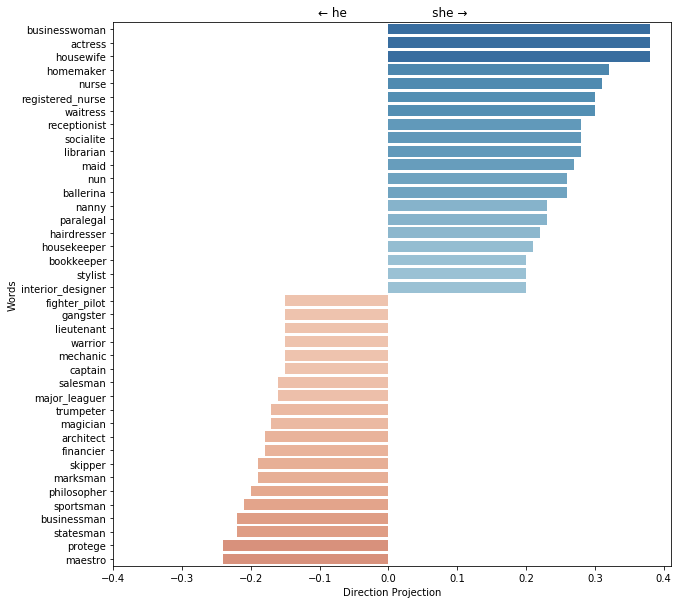

In [42]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_bias.plot_projection_scores(n_extreme=20, ax=ax);

**Mitigating Bias**

In [43]:
# high-level function to calculate gender bias built into responsibly

w2v_small_gender_bias.calc_direct_bias()

0.07307905466893873

In [44]:
neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

0.07307905457595647

In [45]:
len(w2v_small_gender_bias._data['neutral_words'])

26189

In [46]:
import random
print(random.sample(w2v_small_gender_bias._data['neutral_words'],10))

['vet', 'anecdotal', 'fare', 'clothed', 'array', 'attractive', 'reorganization', 'reasonable', 'ideas', 'separate']


In [47]:
# we obtain a version of the embeddings that is mitigated wrt the gender direction
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)


In [48]:
# measure of bias in the original embeddings
w2v_small_gender_bias.calc_direct_bias()

0.07307905464937865

In [49]:
# measure of bias in the mitigated embeddings
w2v_small_gender_debias.calc_direct_bias()


1.1615064677630404e-09

In [50]:
'home' in (w2v_small_gender_bias._data['neutral_words'])


True

In [51]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)


home: before = 0.011340496779172262 after =  -1.1762454503583112e-09


In [52]:
print('architect:',
      'before =', w2v_small_gender_bias.model['architect'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['architect'] @ w2v_small_gender_debias.direction)


architect: before = -0.17738309189742663 after =  -4.154597468190944e-10


In [53]:
print('interior_designer:',
      'before =', w2v_small_gender_bias.model['interior_designer'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['interior_designer'] @ w2v_small_gender_debias.direction)

interior_designer: before = 0.19845774284382503 after =  2.8877261947770835e-09


In [54]:
'man' in (w2v_small_gender_bias._data['neutral_words'])


False

In [55]:
print('man:',
      'before =', w2v_small_gender_bias.model['man'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.direction)


man: before = -0.22095192936041713 after =  -0.2209519293604172


In [56]:
print('woman:',
      'before =', w2v_small_gender_bias.model['woman'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.direction)


woman: before = 0.3403474745246814 after =  0.3403474745246813


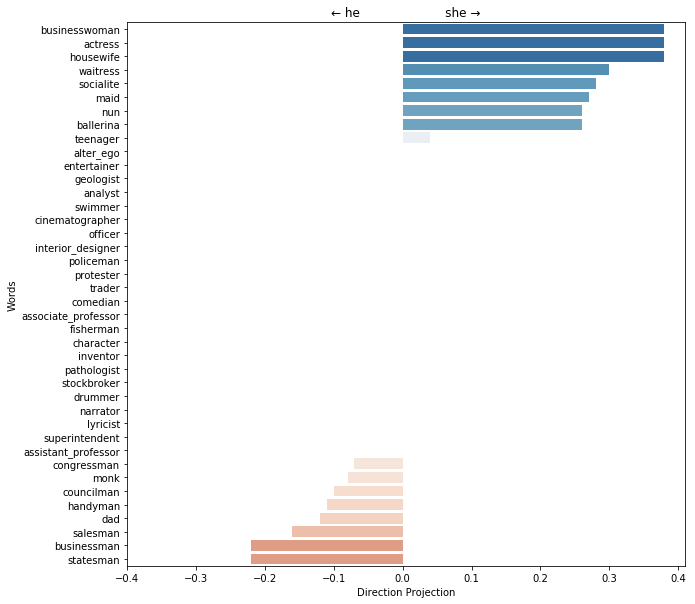

In [57]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_debias.plot_projection_scores(n_extreme=20, ax=ax);